In [1]:
#import all the necessary packages
import numpy as np
import pandas as pd
import sklearn

In [2]:
#import the text file with data from the local machine
#the data is ',' separated
#this is a text file with headers and hence the header row is specified
df = pd.read_csv('E:/Book_Revision/sal1.txt', sep=',', header=0)
print(df)

    Annu_Salary  Expe_Yrs  Skill_lev
0          4000      0.00        0.5
1          6000      1.00        1.0
2          8000      2.00        1.5
3         10000      3.00        2.0
4         12000      4.00        2.5
5         14000      4.50        3.5
6         16000      5.00        4.0
7         14000      4.00        4.0
8         18000      6.00        4.0
9         20000      7.00        4.5
10        22000      8.00        5.0
11        10000      2.00        3.0
12         9000      2.00        2.5
13         9000      2.50        2.0
14         8000      1.00        3.0
15        11000      3.00        2.5
16        13000      4.25        2.7
17         7000      1.00        1.5
18         7000      1.50        1.0
19        11000      3.50        2.0
20        13000      4.50        2.6
21        17000      5.00        4.5
22        17000      5.50        4.0
23        21000      7.50        4.5
24        21000      7.25        4.7
25        15000      5.50        3.0
2

In [3]:
#Thanks to: Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical 
#modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
#Generate multiple linear regression model using statsmodels package
from statsmodels.formula.api import ols
#fit Multiple linear regression model
Mul_Line_Reg_1 = ols('Annu_Salary ~ Expe_Yrs + Skill_lev', data=df).fit()
#print model summary
print(Mul_Line_Reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Annu_Salary   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4469.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.76e-52
Time:                        11:26:15   Log-Likelihood:                -351.37
No. Observations:                  48   AIC:                             708.7
Df Residuals:                      45   BIC:                             714.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3011.6568    162.584     18.524      0.0

In [4]:
#As you can see above the P> |T| value is 0.000 in case of both the predictors
#which confirms the significance of both the predictors to the model
#Also overall Prob (F-statistic) is also negligible compared to the level of 
#significance.  Hence the model generated explains the relationship well

In [5]:
#The following section provides another way of generating the model
#separating the response variable data to a separate dataframe
y = df["Annu_Salary"]
#displaying top 5 values from this dataframe
y.head(5)

0     4000
1     6000
2     8000
3    10000
4    12000
Name: Annu_Salary, dtype: int64

In [6]:
#other than the Annu_Salary other predictor data is carried over to a separate dataframe
X = df.drop(['Annu_Salary'], axis=1)
print(X.dtypes)
#displaying top 5 values from this dataframe
X.head(5)

Expe_Yrs     float64
Skill_lev    float64
dtype: object


,Expe_Yrs,Skill_lev
0,0.0,0.5
1,1.0,1.0
2,2.0,1.5
3,3.0,2.0
4,4.0,2.5


In [7]:
#The data is split as training set and test set
#There are multiple means - Here we are doing it manually
train_samples = (35)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=12)

In [8]:
#importing necessary packages
from sklearn.linear_model import LinearRegression
#running the LinearRegression
Mul_Line_Reg = LinearRegression()
Mul_Line_Reg.fit(X_train, y_train)
#Mul_Line_Reg is the model generated

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#print regression coefficients
print(Mul_Line_Reg.coef_)

[ 1628.07306079  1176.49916823]


In [10]:
#print the regression score using the test data
#this provides the regression model accuracy
Mul_Line_Reg.score(X_test, y_test)

0.99391939705948518

In [11]:
#the above result shows an accuracy of 99.39%
#finding the mean square error on the test predictions
np.mean((Mul_Line_Reg.predict(X_test)-y_test)**2)

158940.20463956954

In [12]:
#the above shows very less overall error in the prediction
#run the model on the test data to arrive at the predicted values
predicted = Mul_Line_Reg.predict(X_test)
#printing the predicted and actual response values
print(predicted)
print(y_test)

[  6527.4644841   22267.50994474  20639.43688395  12588.18283471
  15618.54201002  10371.8601898   22041.72299846  11185.8967202
  18423.11423904  16260.86010886  15392.75506373   8155.53754489]
17     7000
31    22000
23    21000
4     12000
25    15000
3     10000
10    22000
19    11000
44    19000
34    16000
43    15000
2      8000
Name: Annu_Salary, dtype: int64


In [13]:
#as you can see above there is high agreement between the
#predicted and actual values

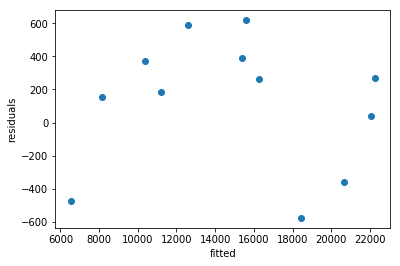

In [14]:
#creating the scatter plot between response variable
#actual values and predicted values
import matplotlib.pyplot as plt
plt.scatter(predicted, (predicted-y_test))
plt.xlabel("fitted")
plt.ylabel("residuals")
#plt.draw()
plt.show()

In [15]:
#Regression Assumption: Linearity: Validation
#As you can see in the above graph the residuals are very small.
#Residuals are randomly spread around the 0.00 residuals.
#Hence, this depicts that the linearity assumption is validated.

#Regression Assumption: Test of equal variance of the distribution of response variable
#As we can see from the plot (above in case of test of linearity), 
#there is there no significant difference in the variation of the residuals 
#for different levels of the independent variable’s values. 
#Hence, we consider that the test of equal variance of the distribution
#of the response variable as passed or validated

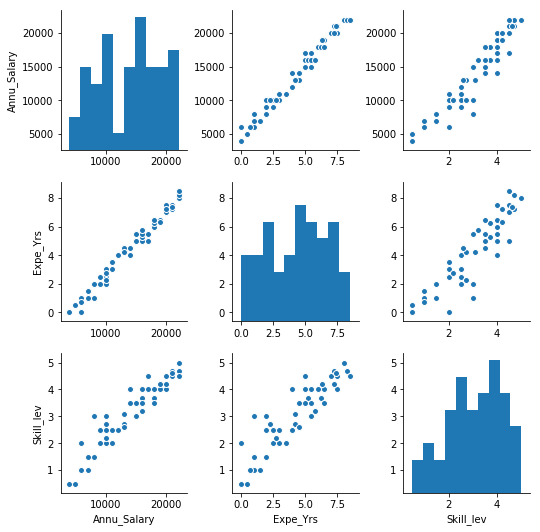

In [16]:
#Alternative way of validating the linear relatinship assumption
#plot the relationship between the data elements in the dataframe
#We use the seaborn package here
import seaborn as sns
sns.pairplot(df)
plt.draw()
plt.show()

In [17]:
#the above graph clearly show the linear relationship between the two variables

In [18]:
#Regression Assumption: No autocorrelation: Validated
#as Durbin-Watson Test above (model summary as shown under 9.6.2)
#gives a result of ~1.339 which shows a small positive autocorrelation. 
#However, from the data collection, we know that each data point is of a 
#different person.  Hence, there is no possibility of autocorrelation.

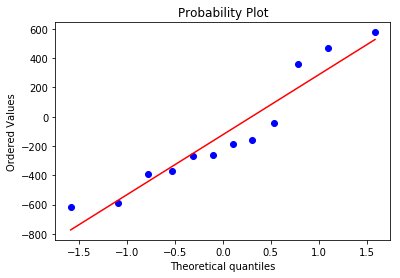

In [19]:
#Validating the regression assumption: Normality
#plotting for the validaton of normal distribution of the residuals
import scipy
from scipy import stats
stats.probplot(y_test-predicted, plot=plt)
plt.show()

In [20]:
#The above plot shows the normal distribution of the residuals
#as they are almost on the 45 degree line

In [27]:
#Now let us create a df with predictors to check that
#the model predicts the values accurately (even though
#we have tested the model against the test data
data = {'col1': [3.0, 5.0], 'col2': [2.0, 4.0]}
df_new_predictors = pd.DataFrame(data=data)
predicted_resp_variable = Mul_Line_Reg.predict(df_new_predictors)
print(predicted_resp_variable)

[ 10371.8601898   15981.00464785]


In [28]:
#You can observe from the above that the predicted values
#are very nearer to the actual values from the initial data
#i.e.10000 and 16000 respectively